In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from datetime import datetime # Para pegar a data atual
import matplotlib.dates as mdates

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

'''
LINK: https://analytics.google.com/

USUÁRIOS E NOVOS USUÁRIOS

https://analytics.google.com/analytics/web/#/p308444970/reports/reportinghub?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130

CAMINHO: barra lateral > Relatórios

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

VISUALIZAÇÕES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-engagement-overview&ruid=lifecycle-engagement-overview,life-cycle,engagement&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Engajamento (dropdown) > Visão geral

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

NOVOS USUÁRIOS E USUÁRIOS RECORRENTES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-retention-overview&ruid=lifecycle-retention-overview,life-cycle,retention&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Retenção

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

PEGAR  O VALOR DE USUÁRIOS RECORRENTE POR SCRAPPING, DIRETO DO ANALYTICS, POIS OS VALORES DE LA PROVAVELMENT SÃO DE USUÁRIOS UNICOS.

'''

import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados
def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

# USUÁRIO ÚNICOS
usuarios_unicos_final = encontrar_frase_em_csv('uniNovos.csv', 'Novos usuários')

usuarios_unicos = pd.read_csv('uniNovos.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos = remover_ultima_linha(usuarios_unicos)
usuarios_unicos = transforma_int(usuarios_unicos)

usuarios_unicos['Nº dia'] = usuarios_unicos['Nº dia']+1


# NOVOS USUÁRIOS
novos_usuarios_final = encontrar_frase_em_csv('uniNovos.csv', 'Tempo médio de engajamento')

novos_usuarios = pd.read_csv('uniNovos.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-47).dropna()

novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios = transforma_int(novos_usuarios)

novos_usuarios['Nº dia'] = novos_usuarios['Nº dia']+1


# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv('visualizacoes.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv('visualizacoes.csv', 'Contagem de eventos')

visualizacoes = pd.read_csv('visualizacoes.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-116).dropna()

visualizacoes = remover_ultima_linha(visualizacoes)
visualizacoes = transforma_int(visualizacoes)

visualizacoes['Nº dia'] = visualizacoes['Nº dia']+1


# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv('novosRec.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv('novosRec.csv', 'Dia 1')

usuarios_recorrentes = pd.read_csv('novosRec.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-48).dropna()

usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
usuarios_recorrentes = transforma_int(usuarios_recorrentes)

usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1

# Configurando o tema do Seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#EE7B12", "#355424", "#ED3013", "#9EC274"]

# Plotando o gráfico de linhas
sns.lineplot(x="Nº dia", y="Visualizações", data=visualizacoes, label="Visualizações", linewidth=2.5, color=cores[2])
sns.lineplot(x="Nº dia", y="Usuários", data=usuarios_unicos, label="Usuários únicos", linewidth=2.5, color=cores[0])
sns.lineplot(x="Nº dia", y="Novos usuários", data=novos_usuarios, label="Novos usuários", linewidth=2.5, color=cores[1])
sns.lineplot(x="Nº dia", y="Usuários recorrentes", data=usuarios_recorrentes, label="Usuários recorrentes", linewidth=2.5, color=cores[3])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

#plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
#plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Dados do portal do mês de ???")

#plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

O arquivo uniNovos.csv não foi encontrado.


FileNotFoundError: [Errno 2] No such file or directory: 'uniNovos.csv'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados

def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

'''
LINK: https://analytics.google.com/

USUÁRIOS E NOVOS USUÁRIOS

https://analytics.google.com/analytics/web/#/p308444970/reports/reportinghub?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130

CAMINHO: barra lateral > Relatórios

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

VISUALIZAÇÕES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-engagement-overview&ruid=lifecycle-engagement-overview,life-cycle,engagement&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Engajamento (dropdown) > Visão geral

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

'''

'''
LINK: https://analytics.google.com/

NOVOS USUÁRIOS E USUÁRIOS RECORRENTES

https://analytics.google.com/analytics/web/#/p308444970/reports/dashboard?params=_u..nav%3Dmaui%26_u.comparisonOption%3Ddisabled%26_u.date00%3D20231101%26_u.date01%3D20231130&r=lifecycle-retention-overview&ruid=lifecycle-retention-overview,life-cycle,retention&collectionId=life-cycle

CAMINHO: barra lateral > Relatórios > Retenção

Ações: Compartilhar esse relatorio (icone) >>> Fazer o download do arquivo >>> Fazer download do CSV

PEGAR  O VALOR DE USUÁRIOS RECORRENTE POR SCRAPPING, DIRETO DO ANALYTICS, POIS OS VALORES DE LA PROVAVELMENT SÃO DE USUÁRIOS UNICOS.

'''

import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados

def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

# USUÁRIO ÚNICOS
usuarios_unicos_final = encontrar_frase_em_csv('uniNovos.csv', 'Novos usuários')

usuarios_unicos = pd.read_csv('uniNovos.csv', skiprows=8, nrows=usuarios_unicos_final-12)

usuarios_unicos = remover_ultima_linha(usuarios_unicos)
usuarios_unicos = transforma_int(usuarios_unicos)

usuarios_unicos['Nº dia'] = usuarios_unicos['Nº dia']+1


# NOVOS USUÁRIOS
novos_usuarios_final = encontrar_frase_em_csv('uniNovos.csv', 'Tempo médio de engajamento')

novos_usuarios = pd.read_csv('uniNovos.csv', skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-47).dropna()

novos_usuarios = remover_ultima_linha(novos_usuarios)
novos_usuarios = transforma_int(novos_usuarios)

novos_usuarios['Nº dia'] = novos_usuarios['Nº dia']+1


# VISUALIZAÇÕES
visualizacoes_inicio = encontrar_frase_em_csv('visualizacoes.csv', 'Visualizações')
visualizacoes_final = encontrar_frase_em_csv('visualizacoes.csv', 'Contagem de eventos')

visualizacoes = pd.read_csv('visualizacoes.csv', skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-116).dropna()

visualizacoes = remover_ultima_linha(visualizacoes)
visualizacoes = transforma_int(visualizacoes)

visualizacoes['Nº dia'] = visualizacoes['Nº dia']+1


# USUARIOS RECORRENTES
recorrentes_inicio = encontrar_frase_em_csv('novosRec.csv', 'Usuários recorrentes')
recorrentes_final = encontrar_frase_em_csv('novosRec.csv', 'Dia 1')

usuarios_recorrentes = pd.read_csv('novosRec.csv', skiprows=recorrentes_inicio-1, nrows=recorrentes_final-48).dropna()

usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
usuarios_recorrentes = transforma_int(usuarios_recorrentes)

usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1

#TOTAL
usuario_unicos_total = usuarios_unicos['Usuários'].sum().astype('int')

novos_usuarios_total = novos_usuarios['Novos usuários'].sum().astype('int')

visualizacoes_total = visualizacoes['Visualizações'].sum()

usuarios_recorrentes_total = usuarios_recorrentes['Usuários recorrentes'].sum().astype('int')

usuarios_recorrentes_total

print(usuario_unicos_total)
print(usuarios_recorrentes_total)
print(visualizacoes_total)
print(novos_usuarios_total)


O arquivo uniNovos.csv não foi encontrado.


FileNotFoundError: [Errno 2] No such file or directory: 'uniNovos.csv'

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

def encontrar_frase_em_csv(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-8') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

def remover_ultima_linha(arquivo):
    dados = arquivo
    
    # Verificar se a última linha atende ao critério
    ultima_linha = dados.iloc[-1]
    if ultima_linha['Nº dia'] not in ['0030', '0029', '0028', '28', '29', '30']:
        # Se não atender ao critério, remover a última linha
        dados = dados.iloc[:-1]

    return dados

def transforma_int(arquivo):
    
    for i in range(len(arquivo.iloc[:,0])):
        arquivo.iloc[i,0] = int(arquivo.iloc[i,0])
    
    for i in range(len(arquivo.iloc[:,1])):
        arquivo.iloc[i,1] = int(arquivo.iloc[i,1])
    
    return arquivo

In [5]:
def usuUnicos_total(arquivo):
    # USUÁRIO ÚNICOS
    usuarios_unicos_final = encontrar_frase_em_csv(arquivo, 'Novos usuários')

    usuarios_unicos = pd.read_csv(arquivo, skiprows=8, nrows=usuarios_unicos_final-12)

    usuarios_unicos = remover_ultima_linha(usuarios_unicos)
    usuarios_unicos = transforma_int(usuarios_unicos)

    usuarios_unicos['Nº dia'] = usuarios_unicos['Nº dia']+1
    
    #TOTAL
    usuario_unicos_total = usuarios_unicos['Usuários'].sum().astype('int')
    
    return usuario_unicos_total

def novosUsu_total(arquivo):
    
    usuarios_unicos_final = encontrar_frase_em_csv(arquivo, 'Novos usuários')

    novos_usuarios_final = encontrar_frase_em_csv(arquivo, 'Tempo médio de engajamento')

    novos_usuarios = pd.read_csv(arquivo, skiprows=usuarios_unicos_final-1, nrows=novos_usuarios_final-47).dropna()

    novos_usuarios = remover_ultima_linha(novos_usuarios)
    novos_usuarios = transforma_int(novos_usuarios)

    novos_usuarios['Nº dia'] = novos_usuarios['Nº dia']+1
    
    novos_usuarios_total = novos_usuarios['Novos usuários'].sum().astype('int')
    
    return novos_usuarios_total

def visualizacoes_total(arquivo):
    visualizacoes_inicio = encontrar_frase_em_csv(arquivo, 'Visualizações')
    visualizacoes_final = encontrar_frase_em_csv(arquivo, 'Contagem de eventos')

    visualizacoes = pd.read_csv(arquivo, skiprows=visualizacoes_inicio-1, nrows=visualizacoes_final-116).dropna()

    visualizacoes = remover_ultima_linha(visualizacoes)
    visualizacoes = transforma_int(visualizacoes)

    visualizacoes['Nº dia'] = visualizacoes['Nº dia']+1
    
    visualizacoes_total = visualizacoes['Visualizações'].sum()
    
    return visualizacoes_total

def usuRec_total(arquivo):
    # USUARIOS RECORRENTES
    recorrentes_inicio = encontrar_frase_em_csv(arquivo, 'Usuários recorrentes')
    recorrentes_final = encontrar_frase_em_csv(arquivo, 'Dia 1')

    usuarios_recorrentes = pd.read_csv(arquivo, skiprows=recorrentes_inicio-1, nrows=recorrentes_final-48).dropna()

    usuarios_recorrentes = remover_ultima_linha(usuarios_recorrentes)
    usuarios_recorrentes = transforma_int(usuarios_recorrentes)

    usuarios_recorrentes['Nº dia'] = usuarios_recorrentes['Nº dia']+1   
    
    usuarios_recorrentes_total = usuarios_recorrentes['Usuários recorrentes'].sum().astype('int')
    
    return usuarios_recorrentes_total

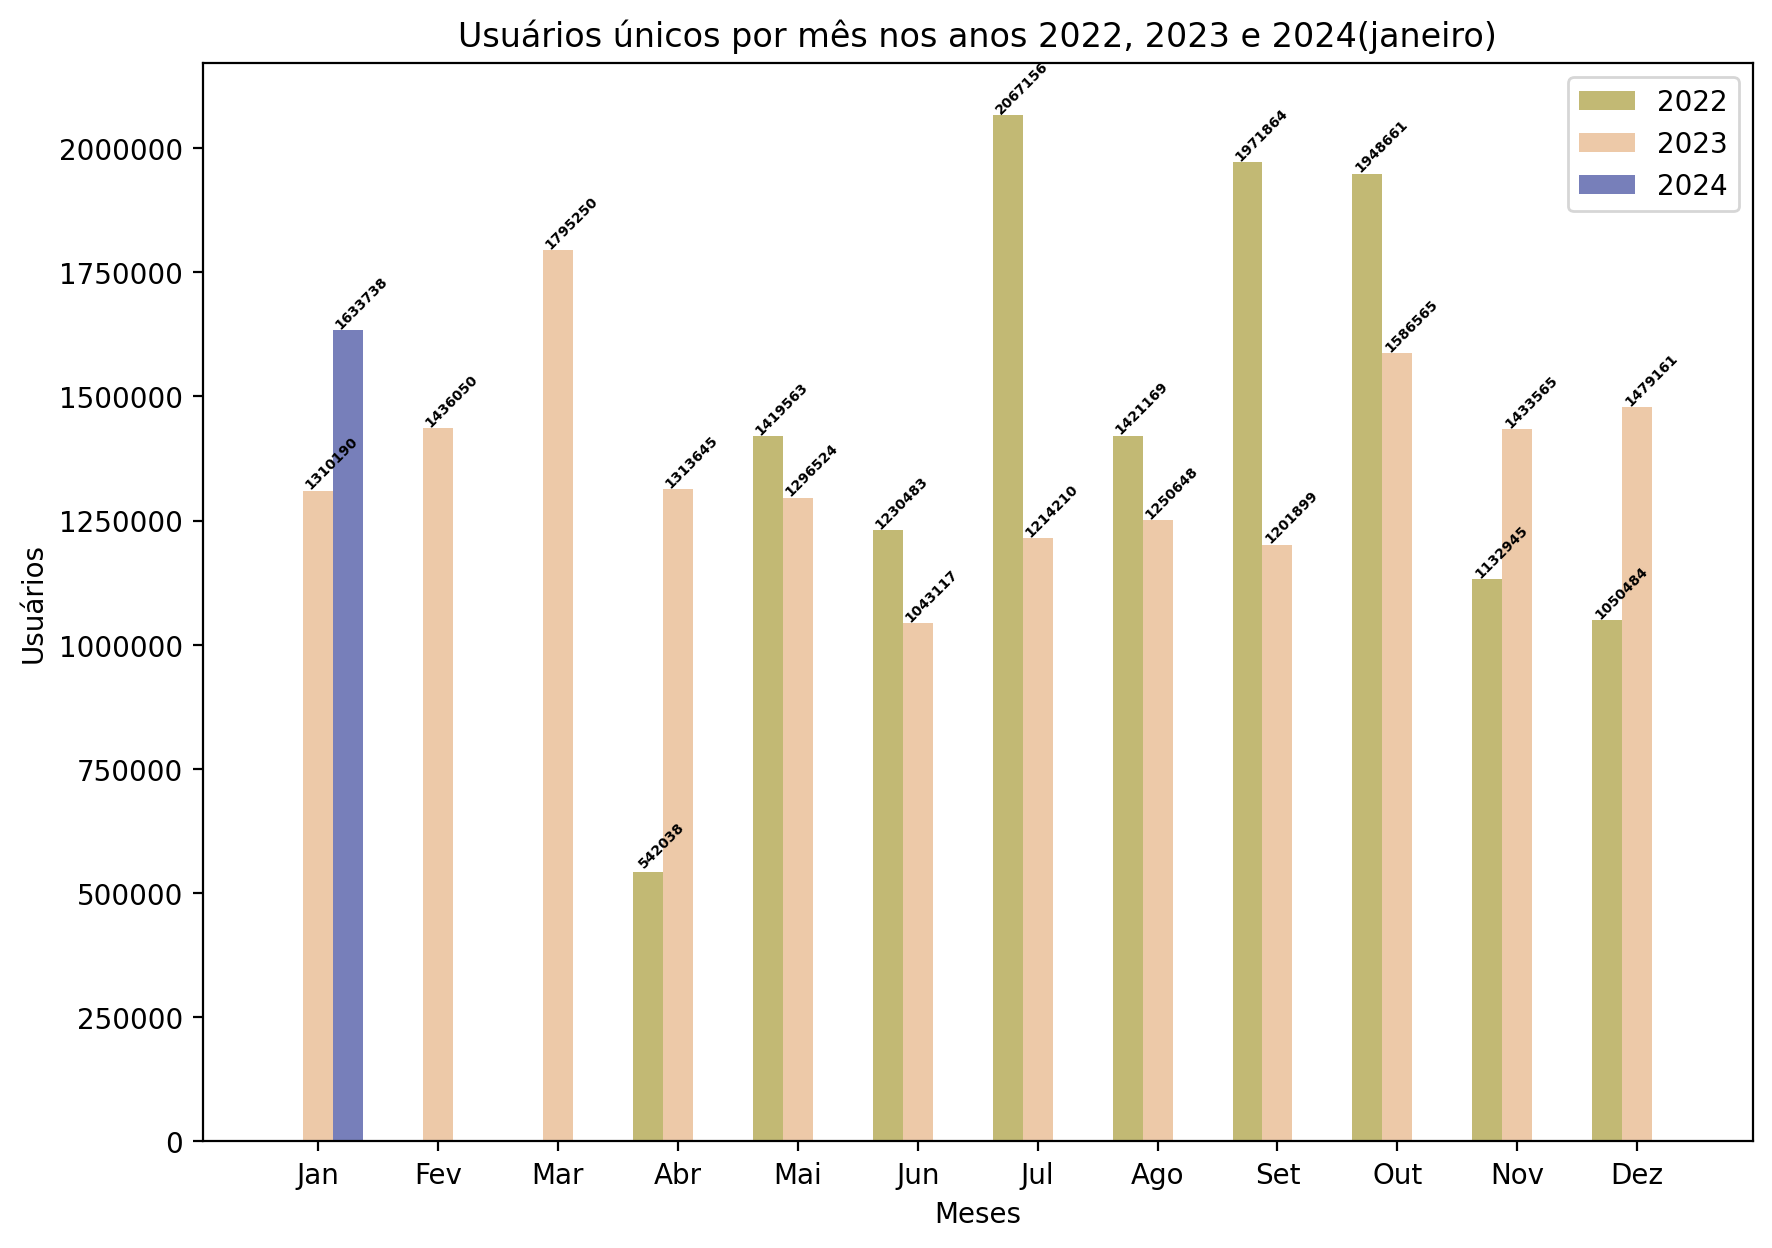

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# USUÁRIOS UNICOS

# Dados de exemplo para os meses de janeiro a dezembro de cada ano
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
usuUnicos_2022 = [0, 0, 0, usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosAbril.csv'), 
                            usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosMaio.csv'), 
                            usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosJunho.csv'), 
                            usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosJulho.csv'), 
                            usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosAgosto.csv'), 
                            usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosSetembro.csv'), 
                            usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosOutubro.csv'), 
                            usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosNovembro.csv'),
                            usuUnicos_total(r'Portal\usuariosUnicosNovos\2022\uniNovosDezembro.csv')]

usuUnicos_2023 = [1310190,1436050,1795250,1313645,1296524,1043117,1214210,1250648,1201899,1586565,1433565,1479161] # Dados fictícios
usuUnicos_2024 = [usuUnicos_total(r'Portal\usuariosUnicosNovos\2024\uniNovosJan.csv'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Dados fictícios

# Definindo a largura das barras
largura_barra = 0.25
plt.figure(figsize=(10,7))

# Definindo a posição das barras no eixo x
posicao_2022 = list(range(len(meses)))
posicao_2023 = [x + largura_barra for x in posicao_2022]
posicao_2024 = [x + largura_barra * 2 for x in posicao_2022]

cores = ["#C2B974","#777FBA","#EDC9A8"]

# Criando o gráfico de barras
plt.bar(posicao_2022, usuUnicos_2022, color=cores[0], width=largura_barra, label='2022')
plt.bar(posicao_2023, usuUnicos_2023, color=cores[2], width=largura_barra, label='2023')
plt.bar(posicao_2024, usuUnicos_2024, color=cores[1], width=largura_barra, label='2024')

# Adicionando rótulos, título e legenda
plt.xlabel('Meses')
plt.ylabel('Usuários')
plt.title('Usuários únicos por mês nos anos 2022, 2023 e 2024(janeiro)')
plt.xticks([x + largura_barra for x in range(len(meses))], meses)
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{p.get_height()}',  # Adiciona rótulo formatado com a altura da barra
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(5, 10), textcoords='offset points', fontsize=5,rotation=45,weight='bold')

# Exibindo o gráfico
# plt.tight_layout()
plt.rcParams['agg.path.chunksize'] = 10000  # Ajuste o tamanho do chunk para melhorar a renderização

# Se estiver usando Jupyter Notebook
%config InlineBackend.figure_format ='retina'  # Ativa o suporte a DPIs altos
plt.show()
plt.savefig('UsuUniBarra.jpg')


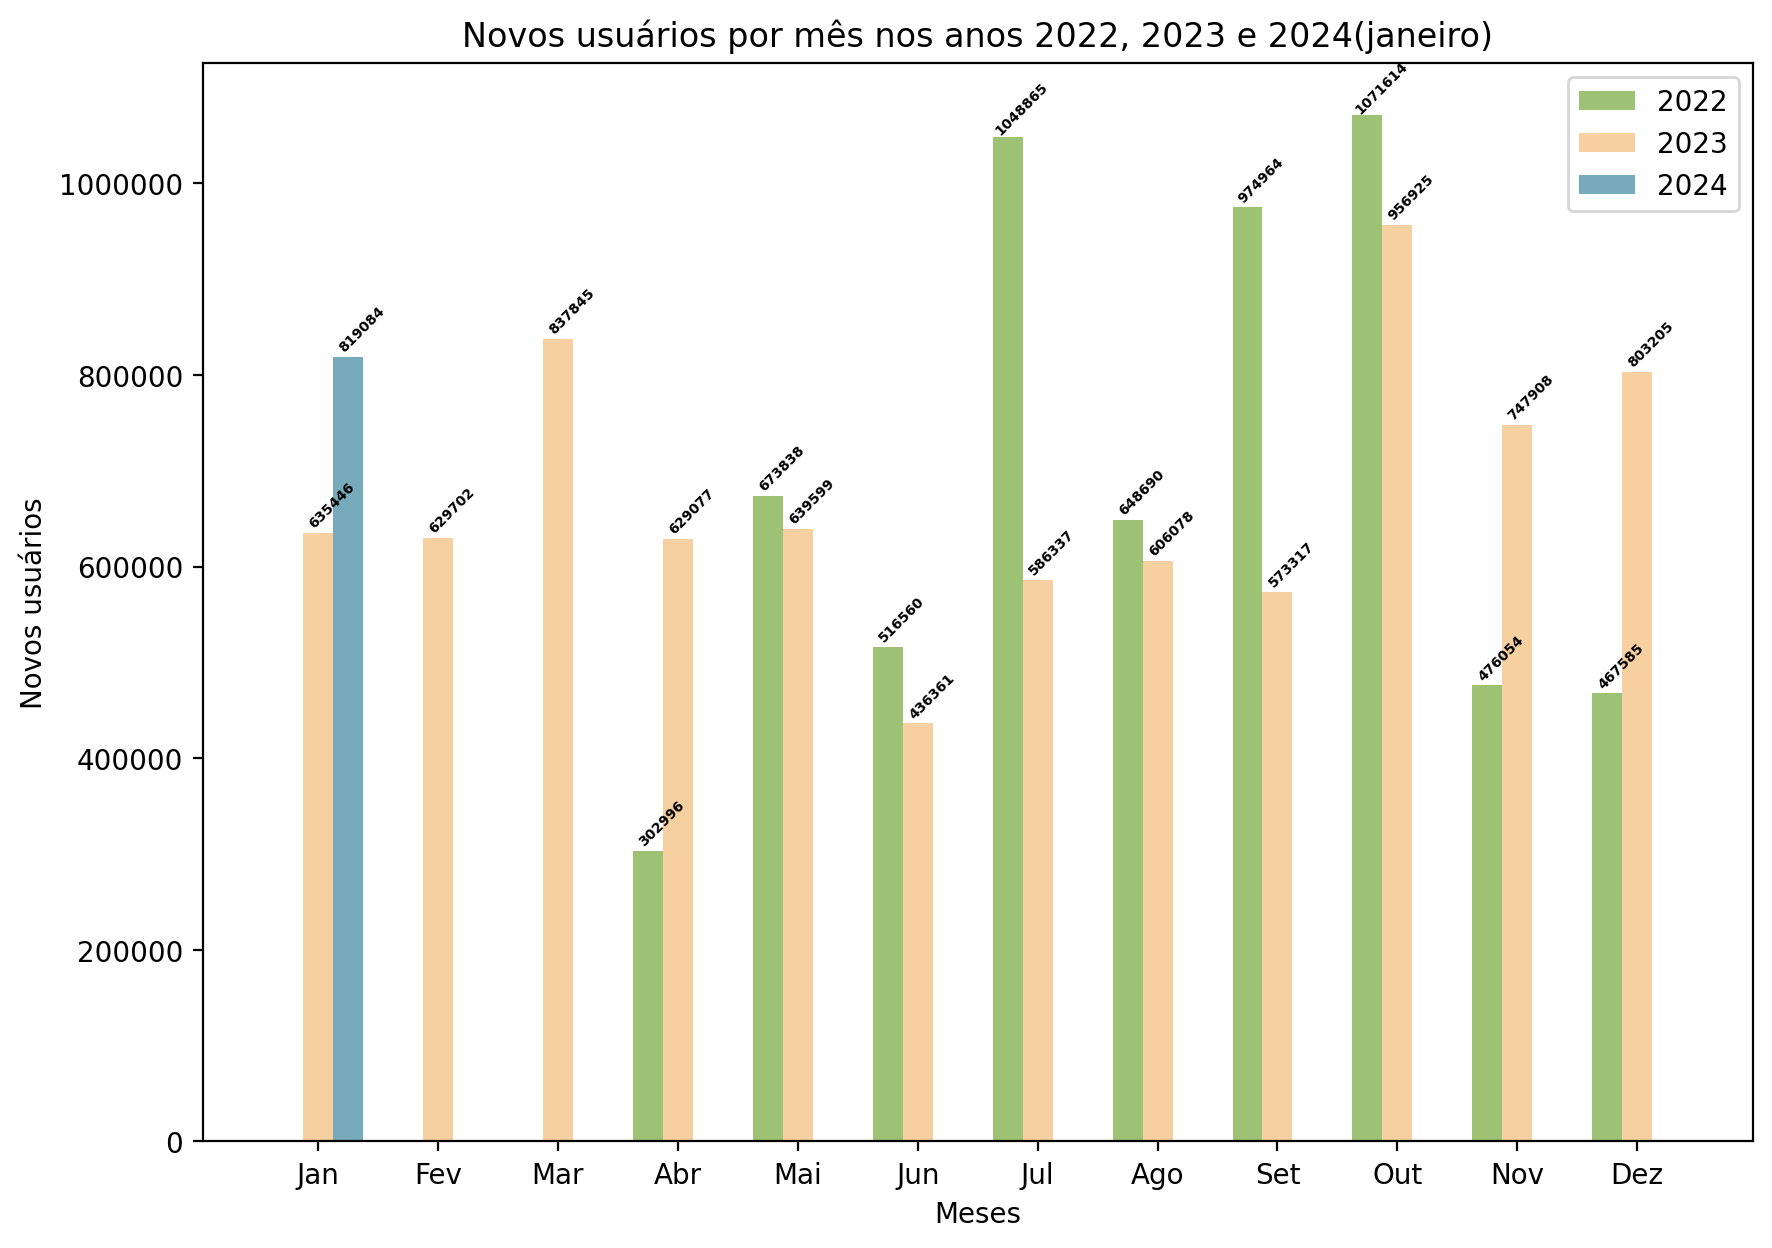

In [31]:
import matplotlib.pyplot as plt

# novos USUÁRIOS

# Dados de exemplo para os meses de janeiro a dezembro de cada ano
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
novosUsu_2022 = [0, 0, 0,   novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosAbril.csv'), 
                            novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosMaio.csv'), 
                            novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosJunho.csv'), 
                            novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosJulho.csv'), 
                            novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosAgosto.csv'), 
                            novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosSetembro.csv'), 
                            novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosOutubro.csv'), 
                            novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosNovembro.csv'),
                            novosUsu_total(r'Portal\usuariosUnicosNovos\2022\uniNovosDezembro.csv')]

novosUsu_2023 = [635446,629702,837845,629077,639599,436361,586337,606078,573317,956925,747908,803205]
novosUsu_2024 = [novosUsu_total(r'Portal\usuariosUnicosNovos\2024\uniNovosJan.csv'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Dados fictícios

# Definindo a largura das barras
largura_barra = 0.25
plt.figure(figsize=(10,7))

# Definindo a posição das barras no eixo x
posicao_2022 = list(range(len(meses)))
posicao_2023 = [x + largura_barra for x in posicao_2022]
posicao_2024 = [x + largura_barra * 2 for x in posicao_2022]

cores = ["#9EC274","#7AB","#F6D0A0"]

# Criando o gráfico de barras
plt.bar(posicao_2022, novosUsu_2022, color=cores[0], width=largura_barra, label='2022')
plt.bar(posicao_2023, novosUsu_2023, color=cores[2], width=largura_barra, label='2023')
plt.bar(posicao_2024, novosUsu_2024, color=cores[1], width=largura_barra, label='2024')

# Adicionando rótulos, título e legenda
plt.xlabel('Meses')
plt.ylabel('Novos usuários')
plt.title('Novos usuários por mês nos anos 2022, 2023 e 2024(janeiro)')
plt.xticks([x + largura_barra for x in range(len(meses))], meses)
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{p.get_height()}',  # Adiciona rótulo formatado com a altura da barra
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(5, 10), textcoords='offset points', fontsize=5,rotation=45,weight='bold')

# Exibindo o gráfico
# plt.tight_layout()
plt.show()


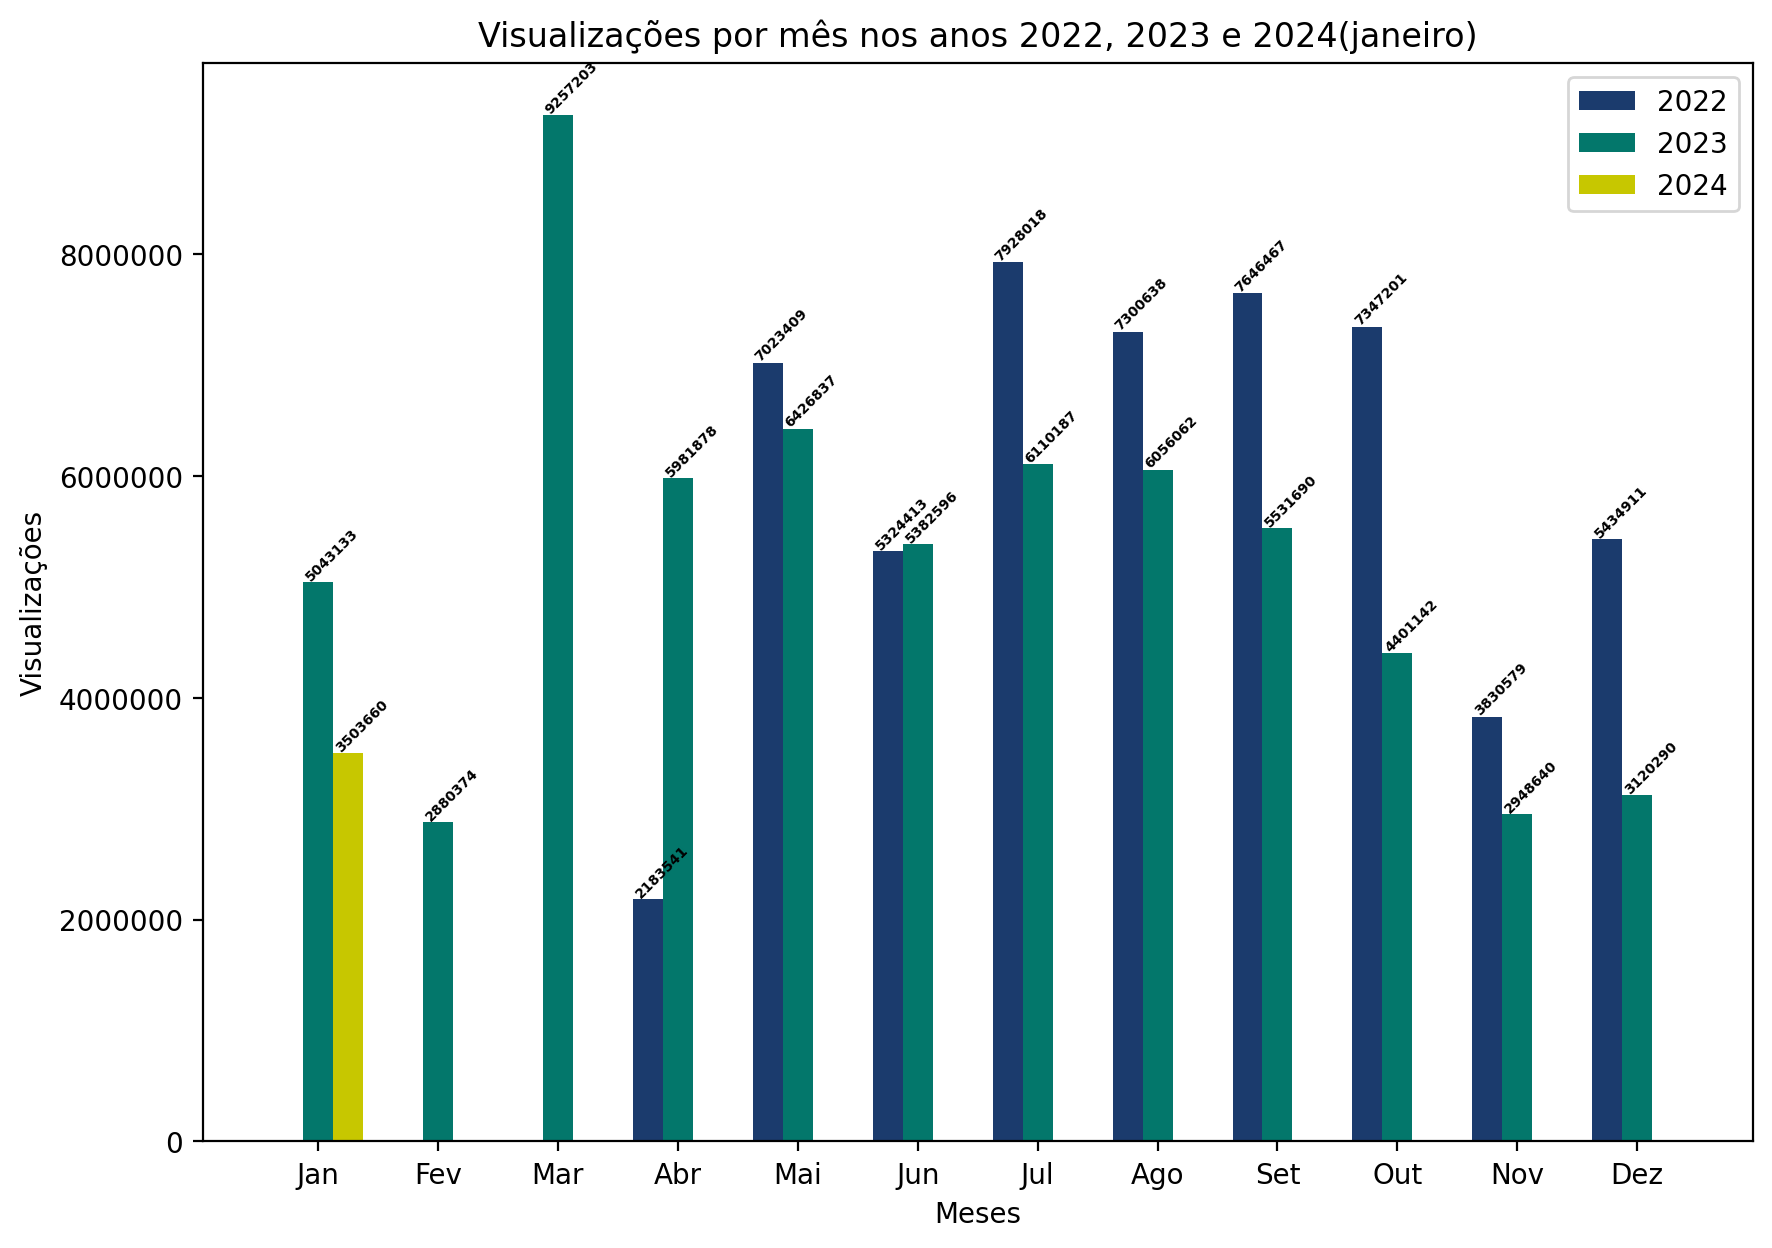

In [29]:
import matplotlib.pyplot as plt

# VISUALIZAÇÕES

# Dados de exemplo para os meses de janeiro a dezembro de cada ano
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
visualizacoes_2022 = [0, 0, 0,  visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesAbril.csv'), 
                                visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesMaio.csv'), 
                                visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesJunho.csv'), 
                                visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesJulho.csv'), 
                                visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesAgosto.csv'), 
                                visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesSetembro.csv'), 
                                visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesOutubro.csv'), 
                                visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesNovembro.csv'), 
                                visualizacoes_total(r'Portal\visualizacoes\2022\visualizacoesDezembro.csv')]
visualizacoes_2023 =  [5043133,2880374,9257203,5981878,6426837,5382596,6110187,6056062,5531690,4401142,2948640,3120290]
visualizacoes_2024 = [visualizacoes_total(r'Portal\visualizacoes\2024\visualizacoesJan.csv'), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Dados fictícios

# Definindo a largura das barras
largura_barra = 0.25
plt.figure(figsize=(10,7))

# Definindo a posição das barras no eixo x
posicao_2022 = list(range(len(meses)))
posicao_2023 = [x + largura_barra for x in posicao_2022]
posicao_2024 = [x + largura_barra * 2 for x in posicao_2022]

cores = ["#1B3B6D","#03776B","#C7C700"]

# Criando o gráfico de barras
plt.bar(posicao_2022, visualizacoes_2022, color=cores[0], width=largura_barra, label='2022')
plt.bar(posicao_2023, visualizacoes_2023, color=cores[1], width=largura_barra, label='2023')
plt.bar(posicao_2024, visualizacoes_2024, color=cores[2], width=largura_barra, label='2024')

# Adicionando rótulos, título e legenda
plt.xlabel('Meses')
plt.ylabel('Visualizações')
plt.title('Visualizações por mês nos anos 2022, 2023 e 2024(janeiro)')
plt.xticks([x + largura_barra for x in range(len(meses))], meses)
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{p.get_height()}',  # Adiciona rótulo formatado com a altura da barra
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(5, 10), textcoords='offset points', fontsize=5,rotation=45,weight='bold')

# Exibindo o gráfico
# plt.tight_layout()
plt.show()


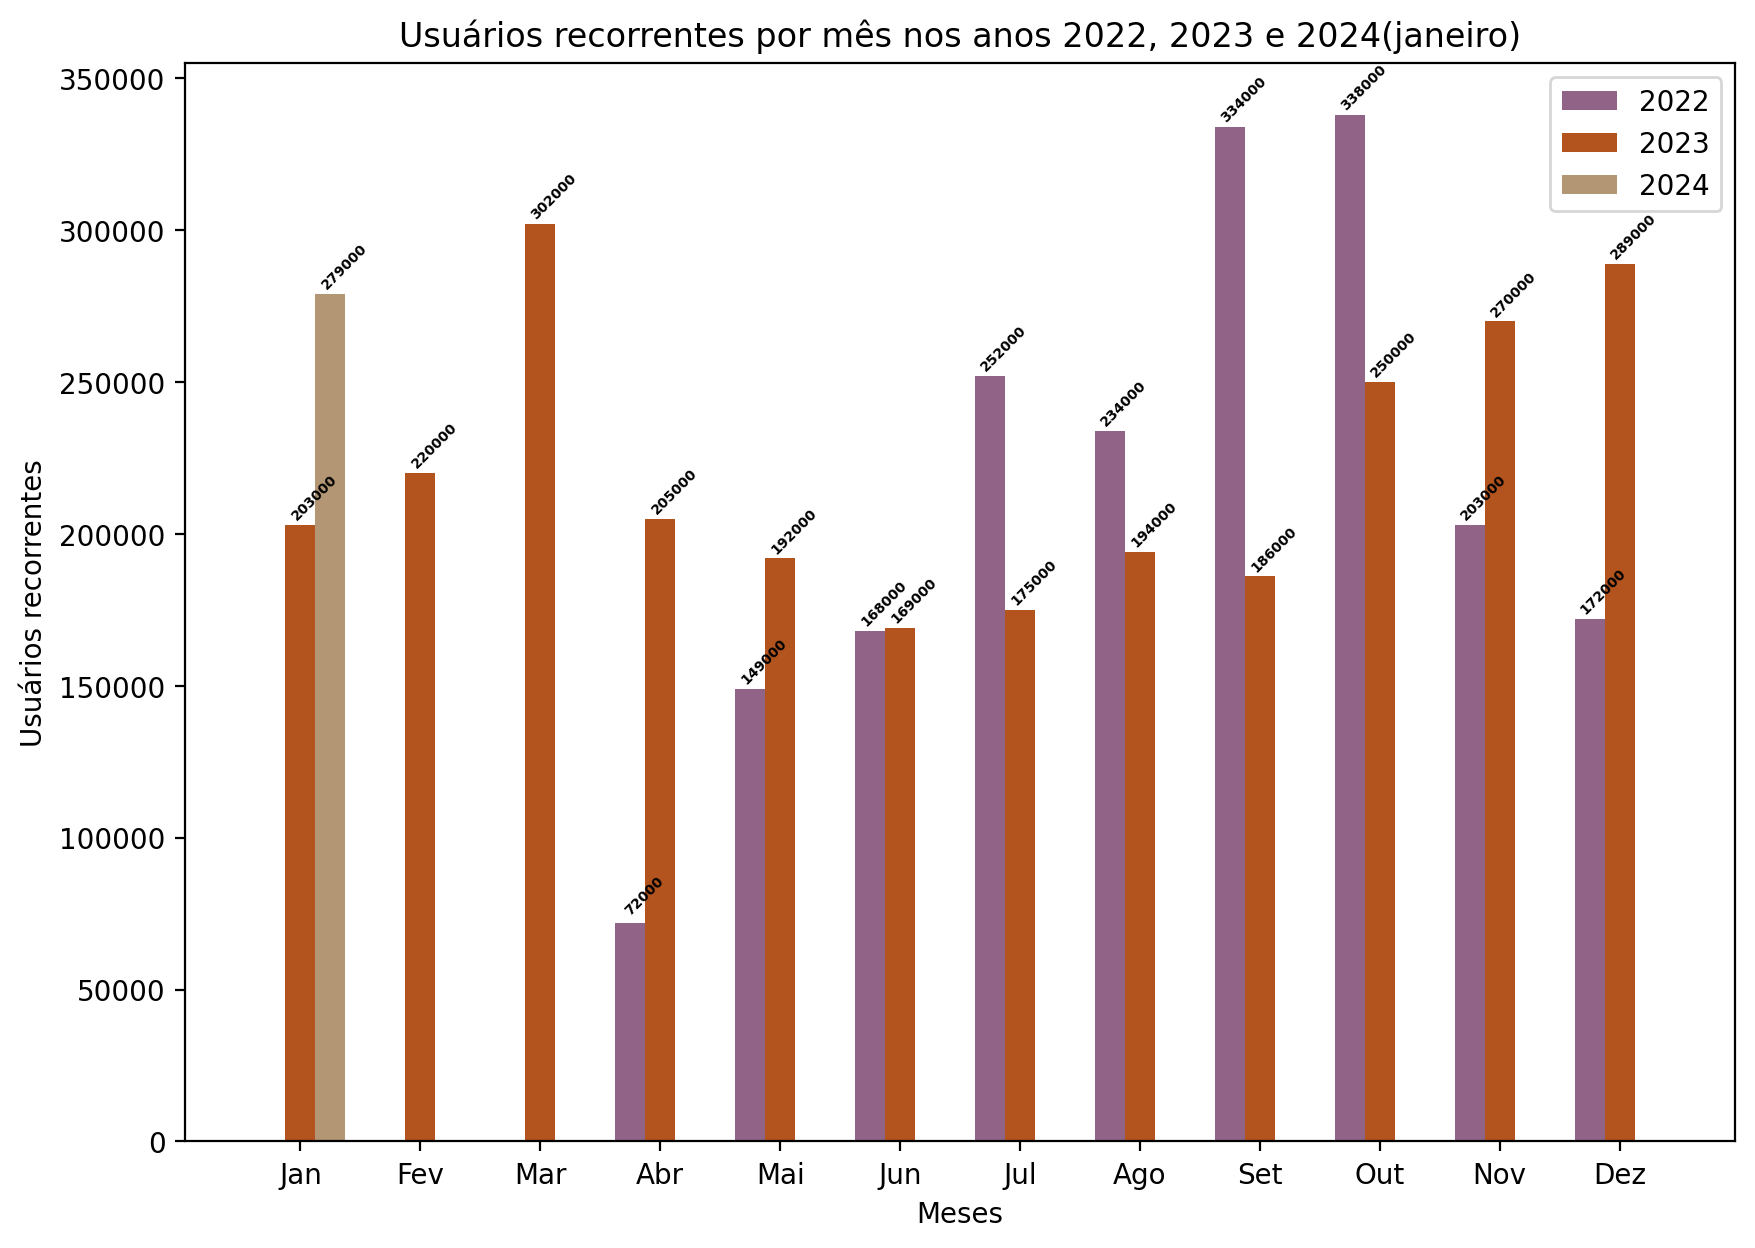

In [30]:
import matplotlib.pyplot as plt

# USUÁRIOS recorrentes

# Dados de exemplo para os meses de janeiro a dezembro de cada ano
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
usuRec_2022 = [0, 0, 0, 72000, 
                        149000, 
                        168000, 
                        252000, 
                        234000, 
                        334000, 
                        338000, 
                        203000, 
                        172000]

usuRec_2023 =  [203000,220000,302000,205000,192000,169000,175000,194000,186000,250000,270000,289000]
usuRec_2024 = [279000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Definindo a largura das barras
largura_barra = 0.25
plt.figure(figsize=(10,7))

# Definindo a posição das barras no eixo x
posicao_2022 = list(range(len(meses)))
posicao_2023 = [x + largura_barra for x in posicao_2022]
posicao_2024 = [x + largura_barra * 2 for x in posicao_2022]

cores = ["#906387","#b3541e","#B39674"]

# Criando o gráfico de barras
plt.bar(posicao_2022, usuRec_2022, color=cores[0], width=largura_barra, label='2022')
plt.bar(posicao_2023, usuRec_2023, color=cores[1], width=largura_barra, label='2023')
plt.bar(posicao_2024, usuRec_2024, color=cores[2], width=largura_barra, label='2024')

# Adicionando rótulos, título e legenda
plt.xlabel('Meses')
plt.ylabel('Usuários recorrentes')
plt.title('Usuários recorrentes por mês nos anos 2022, 2023 e 2024(janeiro)')
plt.xticks([x + largura_barra for x in range(len(meses))], meses)
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{p.get_height()}',  # Adiciona rótulo formatado com a altura da barra
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(5, 10), textcoords='offset points', fontsize=5,rotation=45,weight='bold')

# Exibindo o gráfico
# plt.tight_layout()
plt.show()

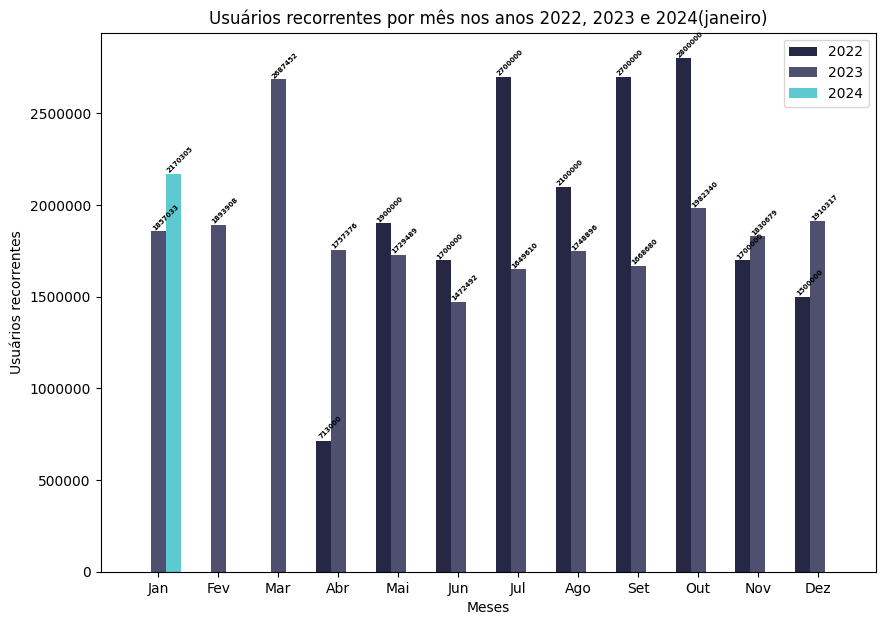

In [4]:
sessoes2022B = [0,0,0,713000,1900000,1700000,2700000,2100000,2700000,2800000,1700000,1500000]

sessoes2023B = pd.read_csv(r'Portal\sessoes\sessoes2023B.csv', skiprows=7)

sessoes2023B.columns = ['Mês','sessoes','nan']

sessoes2024B = pd.read_csv(r'Portal\sessoes\sessoes2024B.csv', skiprows=7)

sessoes2024B.columns = ['Mês','sessoes','nan']

sessoes2024Barra = sessoes2024B['sessoes']

sessoes2024Barra = pd.concat([sessoes2024Barra, pd.Series([0] * (12 - len(sessoes2024Barra)))])

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Definindo a largura das barras
largura_barra = 0.25
plt.figure(figsize=(10,7))

# Definindo a posição das barras no eixo x
posicao_2022 = list(range(len(meses)))
posicao_2023 = [x + largura_barra for x in posicao_2022]
posicao_2024 = [x + largura_barra * 2 for x in posicao_2022]

cores = ["#252745","#4f4f70","#5ccad0"]

# Criando o gráfico de barras
plt.bar(posicao_2022, sessoes2022B, color=cores[0], width=largura_barra, label='2022') # os dados de 2022 foram retirados diretamente de uma das telas do google analytic, pois não estavam disponíveis em CSV. Essa tela já mostra os valores arredondados.
plt.bar(posicao_2023, sessoes2023B['sessoes'], color=cores[1], width=largura_barra, label='2023')
plt.bar(posicao_2024, sessoes2024Barra, color=cores[2], width=largura_barra, label='2024')

# Adicionando rótulos, título e legenda
plt.xlabel('Meses')
plt.ylabel('Usuários recorrentes')
plt.title('Usuários recorrentes por mês nos anos 2022, 2023 e 2024(janeiro)')
plt.xticks([x + largura_barra for x in range(len(meses))], meses)
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{p.get_height()}',  # Adiciona rótulo formatado com a altura da barra
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(5, 10), textcoords='offset points', fontsize=5,rotation=45,weight='bold')

# Exibindo o gráfico
# plt.tight_layout()
plt.show()

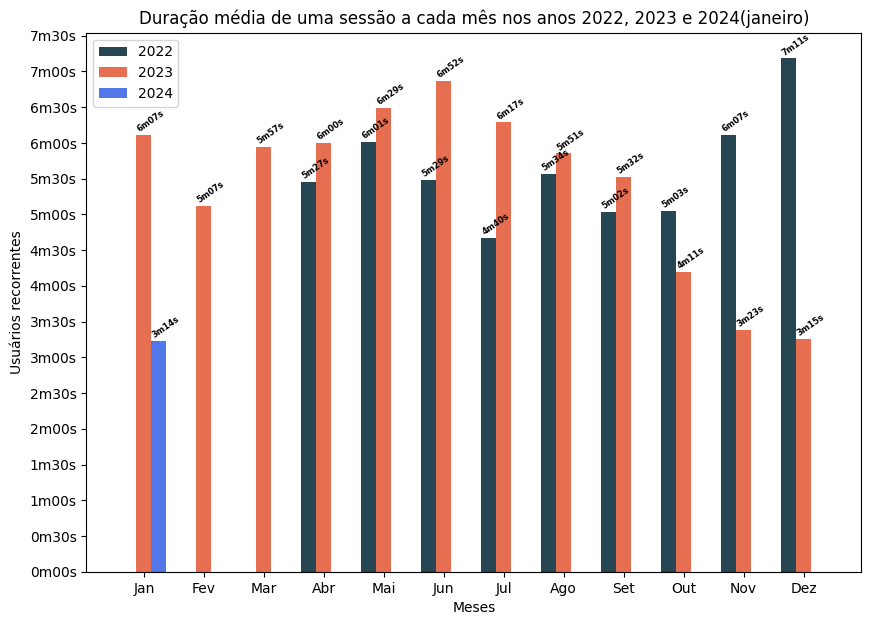

In [48]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

sessoesDurMed2022B = [0,0,0,327,361,329,280,334,302,303,367,431]

sessoesDurMed2023B = pd.read_csv(r'Portal\sessoes\sessoesDurMed2023B.csv', skiprows=7)

sessoesDurMed2023B.columns = ['Mês','sessoes','nan']

sessoesDurMed2024B = pd.read_csv(r'Portal\sessoes\sessoesDurMed2024B.csv', skiprows=7)

sessoesDurMed2024B.columns = ['Mês','sessoes','nan']

sessoesDurMed2024Barra = sessoesDurMed2024B['sessoes']

sessoesDurMed2024Barra = pd.concat([sessoesDurMed2024Barra, pd.Series([0] * (12 - len(sessoesDurMed2024Barra)))])

sessoesDurMed2022B = [x / 60 for x in sessoesDurMed2022B]
sessoesDurMed2023B['sessoes'] = sessoesDurMed2023B['sessoes'] / 60
sessoesDurMed2024Barra = [x / 60 for x in sessoesDurMed2024Barra]

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Definindo a largura das barras
largura_barra = 0.25
plt.figure(figsize=(10,7))

# Definindo a posição das barras no eixo x
posicao_2022 = list(range(len(meses)))
posicao_2023 = [x + largura_barra for x in posicao_2022]
posicao_2024 = [x + largura_barra * 2 for x in posicao_2022]

cores = ["#264653","#e76f51","#5177E8"]

# Criando o gráfico de barras
plt.bar(posicao_2022, sessoesDurMed2022B, color=cores[0], width=largura_barra, label='2022') # os dados de 2022 foram retirados diretamente de uma das telas do google analytic, pois não estavam disponíveis em CSV. Essa tela já mostra os valores arredondados.
plt.bar(posicao_2023, sessoesDurMed2023B['sessoes'], color=cores[1], width=largura_barra, label='2023')
plt.bar(posicao_2024, sessoesDurMed2024Barra, color=cores[2], width=largura_barra, label='2024')

# Adicionando rótulos, título e legenda
plt.xlabel('Meses')
plt.ylabel('Usuários recorrentes')
plt.title('Duração média de uma sessão a cada mês nos anos 2022, 2023 e 2024(janeiro)')
plt.xticks([x + largura_barra for x in range(len(meses))], meses)
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

def minutos_formatter(x, pos):
    minutos = int(x)
    segundos = round((x - minutos) * 60)
    return f"{minutos}m{segundos:02d}s"
#minutos_formatter(p.get_height(), 0)
# Configurando o formato dos valores do eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(minutos_formatter))

#plt.yticks([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5])

#plt.gca().yaxis.set_major_locator(MultipleLocator(9))
#plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))
# Definindo o passo entre os números no eixo Y
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))

for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(f'{minutos_formatter(p.get_height(), 0)}',  # Adiciona rótulo formatado com a altura da barra
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(5, 10), textcoords='offset points', fontsize=6,rotation=35,weight='bold')

# Exibindo o gráfico
# plt.tight_layout()
plt.show()

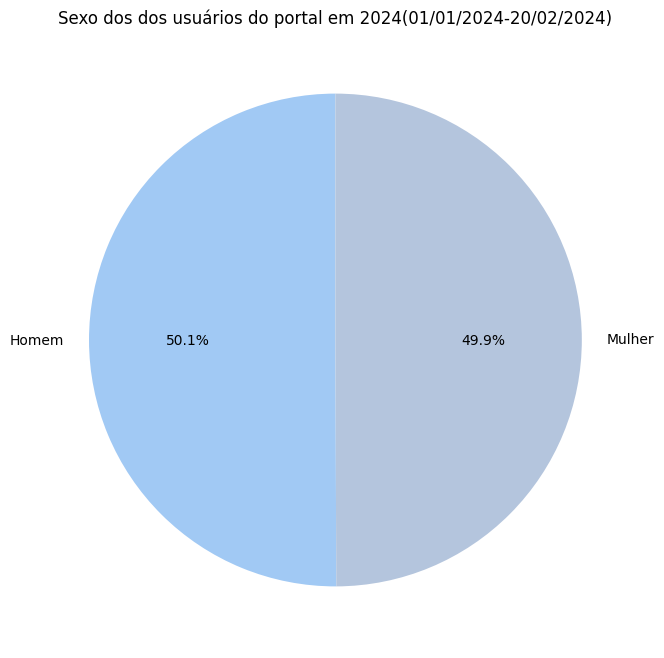

In [72]:
generoPortal24 = pd.read_csv(r'Portal\feGenero.csv',skiprows=1150)

sexoPortal24 = generoPortal24[0:2]

sexoPortal24.iloc[:,1].astype(int)

# Criar um gráfico de pizza usando Matplotlib
plt.figure(figsize=(8, 8))  # Ajuste o tamanho da figura conforme necessário

# Plotar o gráfico de pizza usando Matplotlib
plt.pie(sexoPortal24.iloc[:,1].astype(int), labels=['Homem','Mulher'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("blend:#A1C9F4,#FFB482"))

# Adicionar título
plt.title('Sexo dos dos usuários do portal em 2024(01/01/2024-20/02/2024)')

# Exibir o gráfico
plt.show()

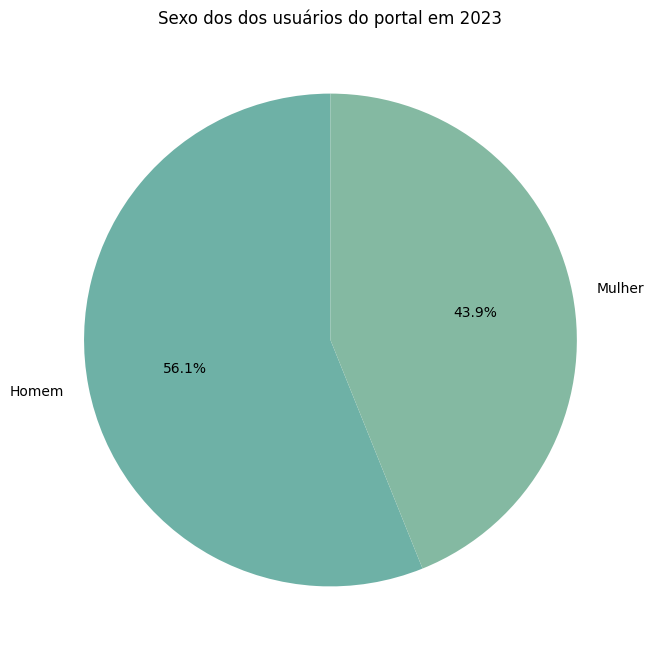

In [71]:
generoPortal23 = pd.read_csv(r'Portal\feGenero23.csv',skiprows=2430)

sexoPortal23 = generoPortal23[0:2]

sexoPortal23.iloc[:,1].astype(int)

# Criar um gráfico de pizza usando Matplotlib
plt.figure(figsize=(8, 8))  # Ajuste o tamanho da figura conforme necessário

# Plotar o gráfico de pizza usando Matplotlib
plt.pie(sexoPortal23.iloc[:,1].astype(int), labels=['Homem','Mulher'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("blend:#6EB1A6,#DBDB92"))

# Adicionar título
plt.title('Sexo dos dos usuários do portal em 2023')

# Exibir o gráfico
plt.show()

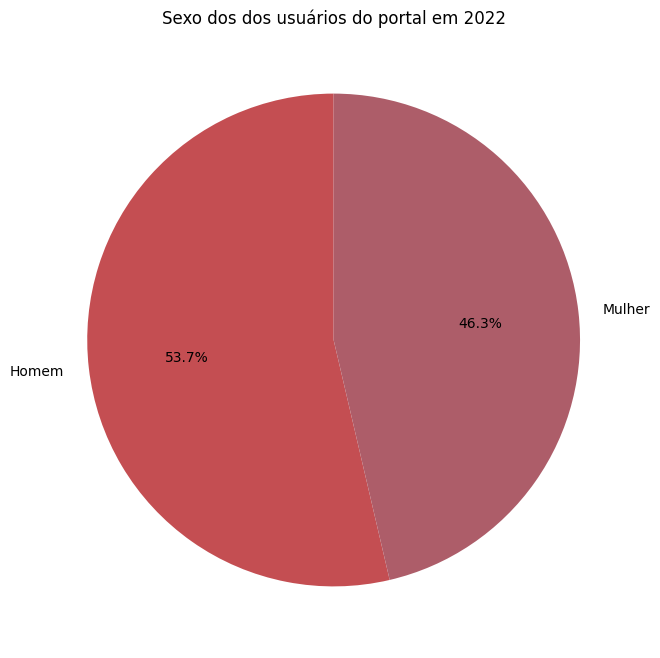

In [70]:
generoPortal22 = pd.read_csv(r'Portal\feGenero22.csv',skiprows=1571)

sexoPortal22 = generoPortal22[0:2]

sexoPortal22.iloc[:,1].astype(int)

# Criar um gráfico de pizza usando Matplotlib
plt.figure(figsize=(8, 8))  # Ajuste o tamanho da figura conforme necessário

# Plotar o gráfico de pizza usando Matplotlib
plt.pie(sexoPortal22.iloc[:,1].astype(int), labels=['Homem','Mulher'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("blend:#C44E52,#4F99C4"))

# Adicionar título
plt.title('Sexo dos dos usuários do portal em 2022')

# Exibir o gráfico
plt.show()


<Figure size 1200x700 with 0 Axes>

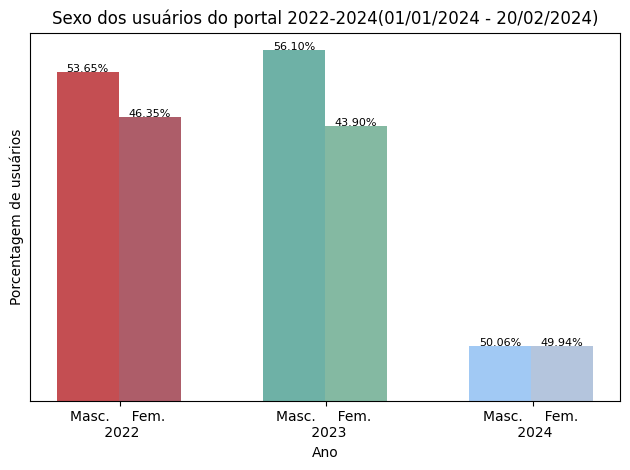

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos dados
generoPortal22 = pd.read_csv(r'Portal\feGenero22.csv', skiprows=1571)
generoPortal23 = pd.read_csv(r'Portal\feGenero23.csv', skiprows=2430)
generoPortal24 = pd.read_csv(r'Portal\feGenero.csv', skiprows=1150)



# Plotando o gráfico de barras
plt.figure(figsize=(12, 7))
fig, ax = plt.subplots()

# Definindo as posições das barras
posicoes = [1, 2, 3]
largura = 0.3

# Dados para os anos de 2022, 2023 e 2024
dados = [
    [sexoPortal22.loc[sexoPortal22['Gênero'] == 'male', 'Usuários'].astype(int).values[0],
    sexoPortal23.loc[sexoPortal23['Gênero'] == 'male', 'Usuários'].astype(int).values[0],
    sexoPortal24.loc[sexoPortal24['Gênero'] == 'male', 'Usuários'].astype(int).values[0]],
    
    [sexoPortal22.loc[sexoPortal22['Gênero'] == 'female', 'Usuários'].astype(int).values[0],
    sexoPortal23.loc[sexoPortal23['Gênero'] == 'female', 'Usuários'].astype(int).values[0],
    sexoPortal24.loc[sexoPortal24['Gênero'] == 'female', 'Usuários'].astype(int).values[0]]
]

# Calculando o total de usuários para cada ano
total_22 = dados[0][0]+dados[1][0]
total_23 = dados[0][1]+dados[1][1]
total_24 = dados[0][2]+dados[1][2]

label_masc = ['Masculino 2022','Masculino 2023','Masculino 2024']
label_fem = ['Feminino 2022','Feminino 2023','Feminino 2024']

# Cores das barras
cores_masc = ['#C44E52', '#6EB1A6', '#A1C9F4']
cores_fem = ['#AD5D69', '#84B9A2', '#B4C5DD']

# Plotando as barras masculinas
for i in range(len(posicoes)):
    ax.bar(posicoes[i] - largura / 2, dados[0][i], largura, label=label_masc[i], color=cores_masc[i])
    porcentagem = (dados[0][i] / total_22) * 100 if i == 0 else ((dados[0][i] / total_23) * 100 if i == 1 else (dados[0][i] / total_24) * 100)
    ax.annotate(f'{porcentagem:.2f}%', (posicoes[i] - largura / 2, dados[0][i] + 200), ha='center', fontsize=8)

# Plotando as barras femininas
for i in range(len(posicoes)):
    ax.bar(posicoes[i] + largura / 2, dados[1][i], largura, label=label_fem[i], color=cores_fem[i])
    porcentagem = (dados[1][i] / total_22) * 100 if i == 0 else ((dados[1][i] / total_23) * 100 if i == 1 else (dados[1][i] / total_24) * 100)
    ax.annotate(f'{porcentagem:.2f}%', (posicoes[i] + largura / 2, dados[1][i] + 200), ha='center', fontsize=8)

ax.set_yticks([])

# Configurando o eixo x
ax.set_xticks([p + largura / 50 for p in posicoes])
ax.set_xticklabels(['Masc.     Fem. \n 2022', 'Masc.     Fem. \n 2023', 'Masc.     Fem. \n 2024'])

# Configurando o título e rótulos dos eixos
plt.title('Sexo dos usuários do portal 2022-2024(01/01/2024 - 20/02/2024)')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de usuários')

# Adicionando legenda
#plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


742299

<Figure size 1200x700 with 0 Axes>

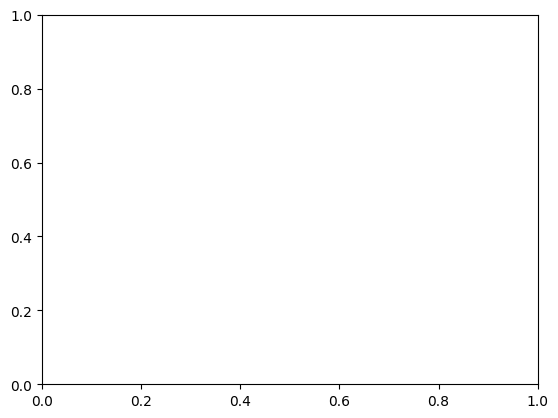

In [62]:
# Leitura dos dados
generoPortal22 = pd.read_csv(r'Portal\feGenero22.csv', skiprows=1571)
generoPortal23 = pd.read_csv(r'Portal\feGenero23.csv', skiprows=2430)
generoPortal24 = pd.read_csv(r'Portal\feGenero.csv', skiprows=1150)



# Plotando o gráfico de barras
plt.figure(figsize=(12, 7))
fig, ax = plt.subplots()

# Definindo as posições das barras
posicoes = [1, 2, 3]
largura = 0.3

# Dados para os anos de 2022, 2023 e 2024
dados = [
    [sexoPortal22.loc[sexoPortal22['Gênero'] == 'male', 'Usuários'].astype(int).values[0],
    sexoPortal23.loc[sexoPortal23['Gênero'] == 'male', 'Usuários'].astype(int).values[0],
    sexoPortal24.loc[sexoPortal24['Gênero'] == 'male', 'Usuários'].astype(int).values[0]],
    
    [sexoPortal22.loc[sexoPortal22['Gênero'] == 'female', 'Usuários'].astype(int).values[0],
    sexoPortal23.loc[sexoPortal23['Gênero'] == 'female', 'Usuários'].astype(int).values[0],
    sexoPortal24.loc[sexoPortal24['Gênero'] == 'female', 'Usuários'].astype(int).values[0]]
]

dados[0][1]